In [9]:
import pandas as pd
# 음주운전사고 데이터 수정
df1 = pd.read_csv('./data/23-12_서울시_음주운전사고_데이터.csv', encoding='utf-8', header=0)
df1['년'] = df1['구분번호'].apply(lambda x: int(str(x)[0:4]))
df1['월'] = df1['구분번호'].apply(lambda x: int(str(x)[4:6]))
df1['일'] = df1['구분번호'].apply(lambda x: int(str(x)[6:8]))
df2 = pd.read_csv('./result/법정동코드.csv', encoding='utf-8', header=0)
df2.rename(columns={'법정동명':'시군구'}, inplace=True)
df1 = df1.merge(df2[['시군구', '법정동코드']], on='시군구', how='left')
df1['요일'] = df1['요일'].apply(lambda x: x[0])
df1['연령대'] = df1['가해운전자 연령대'].apply(lambda x: x[0])
df1['시코드'] = df1['법정동코드'].apply(lambda x: str(x)[0:2])
df1['구코드'] = df1['법정동코드'].apply(lambda x: str(x)[2:5])
df1['동코드'] = df1['법정동코드'].apply(lambda x: str(x)[5:10])
df1['법정동코드'] = df1['법정동코드'].apply(lambda x: str(x))
df1 = df1.drop_duplicates(subset='구분번호')
df1.to_csv('./result/23-12_서울시_음주운전사고_데이터.csv', encoding='utf-8', index=False)
df1


,구분번호,발생년월,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,구,동,년,월,일,법정동코드,연령대,시코드,구코드,동코드
0,2023010100100056,2023년 1월,일,서울특별시 강남구 논현동,중상사고,0,1,0,0,차대차 - 추돌,...,강남구,논현동,2023,1,1,1168010800,2,11,680,10800
1,2023010100100075,2023년 1월,일,서울특별시 강남구 역삼동,경상사고,0,0,1,0,차대차 - 추돌,...,강남구,역삼동,2023,1,1,1168010100,3,11,680,10100
2,2023010200100438,2023년 1월,월,서울특별시 강남구 도곡동,경상사고,0,0,1,0,차대차 - 추돌,...,강남구,도곡동,2023,1,2,1168011800,2,11,680,11800
3,2023010500100454,2023년 1월,목,서울특별시 강남구 역삼동,경상사고,0,0,2,0,차대차 - 추돌,...,강남구,역삼동,2023,1,5,1168010100,4,11,680,10100
4,2023010500100486,2023년 1월,목,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대차 - 추돌,...,강남구,삼성동,2023,1,5,1168010500,4,11,680,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,2023112200100026,2023년 11월,수,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 기타,...,중랑구,면목동,2023,11,22,1126010100,2,11,260,10100
2729,2023112700100474,2023년 11월,월,서울특별시 중랑구 묵동,경상사고,0,0,6,0,차대차 - 기타,...,중랑구,묵동,2023,11,27,1126010400,5,11,260,10400
2730,2023120800100563,2023년 12월,금,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 충돌,...,중랑구,면목동,2023,12,8,1126010100,6,11,260,10100
2731,2023122100100001,2023년 12월,목,서울특별시 중랑구 묵동,경상사고,0,0,1,0,차대차 - 충돌,...,중랑구,묵동,2023,12,21,1126010400,2,11,260,10400


In [50]:
import pandas as pd
df3 = pd.read_csv('./data/서울_단속_적발.csv', encoding='utf-8', header=0)
df4 = pd.read_csv('./result/법정동코드.csv', encoding='utf-8', header=0)
df_na = df4[df4['동'].isna()]
df3 = df3.merge(df_na[['구','법정동코드']], on='구', how='left')
df3['시코드'] = df3['법정동코드'].apply(lambda x: str(x)[0:2])
df3['구코드'] = df3['법정동코드'].apply(lambda x: str(x)[2:5])
df3['년'] = df3['측정일시'].apply(lambda x: int(x.split()[0].split('/')[0]))
df3['월'] = df3['측정일시'].apply(lambda x: int(x.split()[0].split('/')[1]))
df3['일'] = df3['측정일시'].apply(lambda x: int(x.split()[0].split('/')[2]))
df3['시'] = df3['측정일시'].apply(lambda x: int(x.split()[1].split(':')[0]))
df3['연령대'] = df3['나이'].apply(lambda x: 0 if str(x).startswith('불') else int(str(x)[0]))
df3.drop('연번', axis=1, inplace=True)
df3.to_csv('./result/서울_단속_적발.csv', encoding='utf-8', index=False)
df3

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,구,법정동코드,시코드,구코드,년,월,일,시,연령대
0,남자,5,50,0.075,N,2023/01/01 00:44:00,서울성북경찰서,성북구,1129000000,11,290,2023,1,1,0,5
1,남자,1,27,0.134,N,2023/01/01 01:36:00,서울마포경찰서,마포구,1144000000,11,440,2023,1,1,1,2
2,남자,3,52,0.115,N,2023/01/01 01:44:00,서울종암경찰서,성북구,1129000000,11,290,2023,1,1,1,5
3,남자,1,29,0.184,N,2023/01/01 02:08:00,서울마포경찰서,마포구,1144000000,11,440,2023,1,1,2,2
4,남자,3,43,0.106,N,2023/01/01 02:19:00,서울서초경찰서,서초구,1165000000,11,650,2023,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14760,남자,2,28,0.130,N,2023/12/31 14:27:00,서울중부경찰서,중구,1114000000,11,140,2023,12,31,14,2
14761,남자,1,48,0.172,N,2023/12/31 15:49:00,서울은평경찰서,은평구,1138000000,11,380,2023,12,31,15,4
14762,남자,3,53,0.205,N,2023/12/31 22:10:00,서울은평경찰서,은평구,1138000000,11,380,2023,12,31,22,5
14763,남자,3,67,0.194,N,2023/12/31 22:28:00,서울강서경찰서,강서구,1150000000,11,500,2023,12,31,22,6


In [4]:
from datetime import datetime
import pandas as pd
df5 = pd.read_csv('./data/서울_단속_적발.csv', encoding='utf-8', header=0)
df5
def get_weekday(row):
    date = datetime(year=int(row['년']), month=int(row['월']), day=int(row['일']))
    return date.strftime('%A')  # 또는 '%a' (Mon, Tue...), '%A' (Monday, Tuesday...)

# 새 컬럼으로 요일 추가
df5['요일'] = df5.apply(get_weekday, axis=1)
df5['요일'] = df5['요일'].apply(lambda x: '일' if x == 'Sunday' else
          '월' if x == 'Monday' else
          '화' if x == 'Tuesday' else
          '수' if x == 'Wednesday' else
          '목' if x == 'Thursday' else
          '금' if x == 'Friday' else
          '토')
df5.to_csv('./result/서울_단속_적발.csv', encoding='utf-8', index=False)
df5

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,구,법정동코드,시코드,구코드,년,월,일,시,연령대,요일
0,남자,5,50,0.075,N,2023/01/01 00:44:00,서울성북경찰서,성북구,1129000000,11,290,2023,1,1,0,5,일
1,남자,1,27,0.134,N,2023/01/01 01:36:00,서울마포경찰서,마포구,1144000000,11,440,2023,1,1,1,2,일
2,남자,3,52,0.115,N,2023/01/01 01:44:00,서울종암경찰서,성북구,1129000000,11,290,2023,1,1,1,5,일
3,남자,1,29,0.184,N,2023/01/01 02:08:00,서울마포경찰서,마포구,1144000000,11,440,2023,1,1,2,2,일
4,남자,3,43,0.106,N,2023/01/01 02:19:00,서울서초경찰서,서초구,1165000000,11,650,2023,1,1,2,4,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14760,남자,2,28,0.130,N,2023/12/31 14:27:00,서울중부경찰서,중구,1114000000,11,140,2023,12,31,14,2,일
14761,남자,1,48,0.172,N,2023/12/31 15:49:00,서울은평경찰서,은평구,1138000000,11,380,2023,12,31,15,4,일
14762,남자,3,53,0.205,N,2023/12/31 22:10:00,서울은평경찰서,은평구,1138000000,11,380,2023,12,31,22,5,일
14763,남자,3,67,0.194,N,2023/12/31 22:28:00,서울강서경찰서,강서구,1150000000,11,500,2023,12,31,22,6,일


In [37]:
import pandas as pd

df6 = pd.read_csv('./data/용도지역+현황_20250411091634.csv', encoding='utf-8', header=4)
df6.rename(columns={'자치구별(2)':'구','소계':'용도지역총계','소계.1':'주거지역소계','소계.2':'전용주거지역소계','소계.3':'일반주거지역소계','소계.4':'준주거지역','소계.5':'상업지역소계','소계.6':'중심상업지역','소계.7':'일반상업지역','소계.8':'근린상업지역','소계.9':'유통상업지역','소계.10':'공업지역소계','소계.11':'전용공업지역','소계.12':'일반공업지역','소계.13':'준공업지역','소계.14':'녹지지역소계','소계.15':'보전녹지지역','소계.16':'생산녹지지역','소계.17':'지연녹지지역'}, inplace=True)
df6.drop('자치구별(1)', axis=1, inplace=True)
df4 = pd.read_csv('./result/법정동코드.csv', encoding='utf-8', header=0)
df_na = df4[df4['동'].isna()]
df6 = df6.merge(df_na[['구','법정동코드']], on='구', how='left')
df6['법정동코드'] = df6['법정동코드'].astype('Int64')
df6.loc[1:,'시코드'] = 11
df6.loc[1:,'구코드'] = df6.loc[1:,'법정동코드'].apply(lambda x: int(str(x)[2:5]))
df6['시코드'] = df6['시코드'].astype('Int64')
df6['구코드'] = df6['구코드'].astype('Int64')
df6.fillna(0, inplace=True)
df6 = df6.replace('-', 0)
df6.iloc[:,1:] = df6.iloc[:,1:].astype(int)
df6.to_csv('./result/서울_용도지역현황_2023.csv', encoding='utf-8', index=False)
df6

C:\Users\it\AppData\Local\Temp\ipykernel_6396\3585187291.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df6 = df6.replace('-', 0)


,구,용도지역총계,주거지역소계,전용주거지역소계,제1종전용,제2종전용,일반주거지역소계,제1종일반,제2종일반(7층이하),제2종일반,...,전용공업지역,일반공업지역,준공업지역,녹지지역소계,보전녹지지역,생산녹지지역,지연녹지지역,법정동코드,시코드,구코드
0,소계,605598290,326503779,5891548,5047184,844365,306807626,67524772,85315392,55714514,...,0,0,19974140,233471327,72603,1057622,232341102,0,0,0
1,종로구,23972507,9830838,1589410,1589410,0,8042329,4376462,2198489,704764,...,0,0,0,11204384,0,0,11204384,1111000000,11,110
2,중구,9974292,6013132,0,0,0,5740685,2767697,1264611,514821,...,0,0,0,25135,0,0,25135,1114000000,11,140
3,용산구,21898766,12181023,224153,224153,0,11353194,4097899,3251844,1243251,...,0,0,0,8443345,72603,0,8370742,1117000000,11,170
4,성동구,16804426,9931728,0,0,0,9657083,2386869,3048494,1255166,...,0,0,2051234,4332406,0,0,4332406,1120000000,11,200
5,광진구,17075115,11593626,140987,140987,0,10465173,2239038,2895373,2807352,...,0,0,0,5274873,0,0,5274873,1121500000,11,215
6,동대문구,14245433,13036995,0,0,0,12465015,2655472,3515108,2378304,...,0,0,0,383081,0,0,383081,1123000000,11,230
7,중랑구,18531520,10808521,0,0,0,9966445,1034286,4297193,1640845,...,0,0,0,7352187,0,0,7352187,1126000000,11,260
8,성북구,24621432,17826125,990658,990658,0,16267757,5204458,4418093,2460528,...,0,0,0,6394593,0,0,6394593,1129000000,11,290
9,강북구,23636019,10890430,0,0,0,10459698,2840961,4242062,1028274,...,0,0,0,12464840,0,0,12464840,1130500000,11,305


In [63]:
df7 = pd.read_csv('./data/서울시 유흥주점영업 인허가 정보.csv', encoding='euc-kr', header=0)
df7 = df7[~df7['인허가일자'].astype(str).str.startswith("2024")]
df7 = df7[~df7['인허가일자'].astype(str).str.startswith("2025")]
df7 = df7[df7['영업상태코드'] == 1]
df7 = df7.dropna(subset=['지번주소'])
df7['구'] = df7['지번주소'].apply(lambda x: x.split()[1])
df7

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,구
0,3220000,3220000-102-2000-21430,2000-03-18,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
1,3090000,3090000-102-2007-00004,2007-12-20,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,도봉구
2,3220000,3220000-102-2001-23481,2001-05-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
3,3230000,3230000-102-2014-00005,2014-11-28,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구
4,3150000,3150000-102-2015-00003,2015-10-22,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,3240000,3240000-102-2009-00001,2009-01-21,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,288.99,NaN,NaN,NaN,강동구
4778,3240000,3240000-102-2009-00002,2009-04-07,NaN,1,영업/정상,1,영업,NaN,NaN,...,0.0,NaN,0.0,0.0,Y,96.33,NaN,NaN,NaN,강동구
4836,3240000,3240000-102-2005-00002,2005-10-18,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,148.60,NaN,NaN,NaN,강동구
4837,3240000,3240000-102-2006-00005,2006-05-29,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,97.05,NaN,NaN,NaN,강동구


In [126]:
df8 = pd.read_csv('./data/도로+현황(폭원별)(1987년+이후)_20250411163326.csv', encoding='utf-8', header=1)
df8.rename(columns={'행정구역(서울)(2)':'구'}, inplace=True)
df8.drop(columns='행정구역(서울)(1)', inplace=True)
df8.to_csv('./result/서울_도로_2023.csv', encoding='utf-8', index=False)
df8

,구,도로,광로(40m이상),대로(25∼40m미만),중로(12∼25미만m),소로(12m미만),광장 (개소)
0,소계,8330400,250137,760307,964018,6355938,95
1,종로구,275701,7950,23872,31721,212158,10
2,중구,114232,9002,16722,20006,68502,14
3,용산구,281073,11678,43379,27923,198093,4
4,성동구,408339,4370,21185,48600,334184,5
5,광진구,322897,3700,30458,23288,265451,2
6,동대문구,329504,4300,35819,35508,253877,7
7,중랑구,331468,0,29846,45709,255913,1
8,성북구,628266,1744,32135,51223,543164,0
9,강북구,227825,0,15923,30647,181255,1


In [21]:
import pandas as pd
df9 = pd.read_csv('./data/음주운전+교통사고+현황_20250415134735.csv', encoding='utf-8', header=1)
# df9.rename(columns={'발생건수 (건)':'음주운전발생건수','사망자수 (명)':'음주운전사망자수','부상자수 (명)':'음주운전부상자수','자치구별(2)':"구"}, inplace=True)
# df9.drop('자치구별(1)', axis=1, inplace=True)
df9.replace('-',0, inplace=True)
df9[df9.columns[[3, 6, 9, 12, 15]]] = df9[df9.columns[[3, 6, 9, 12, 15]]].astype(int)
df9['음주운전교통사고발생건수소계'] = df9[df9.columns[[2, 5, 8, 11, 14]]].sum(axis=1)
df9['음주운전교통사고사망자수소계'] = df9[df9.columns[[3, 6, 9, 12, 15]]].sum(axis=1)
df9['음주운전교통사고부상자수소계'] = df9[df9.columns[[4, 7, 10, 13, 16]]].sum(axis=1)
df9.drop(columns=df9.columns[2:17], inplace=True)
df9.drop(columns=df9.columns[0:1], inplace=True)
df9.rename(columns={'자치구별(2)':'구'}, inplace=True)
df9

,구,음주운전교통사고발생건수소계,음주운전교통사고사망자수소계,음주운전교통사고부상자수소계
0,소계,10862,83,17831
1,종로구,248,0,383
2,중구,204,2,312
3,용산구,368,6,612
4,성동구,349,3,573
5,광진구,340,1,568
6,동대문구,295,2,421
7,중랑구,323,3,502
8,성북구,267,3,429
9,강북구,236,3,381


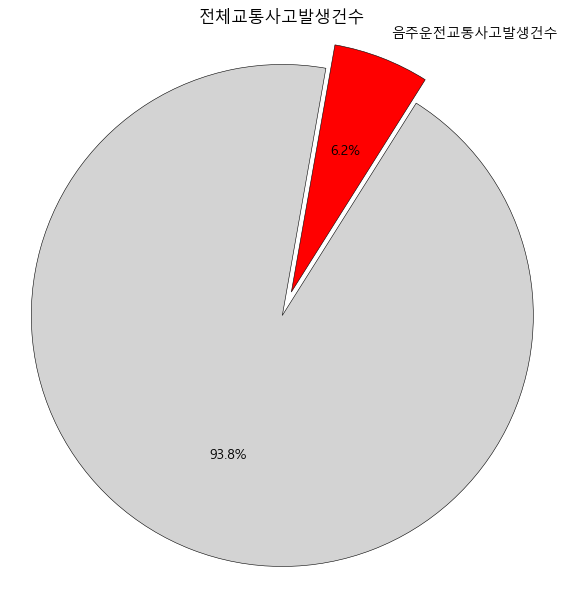

,구,전체교통사고발생건수소계,전체교통사고사망자수소계,전체교통사고부상자수소계,음주운전교통사고발생건수소계,음주운전교통사고사망자수소계,음주운전교통사고부상자수소계,음주운전발생비율 %,비음주운전교통사고사망위험도 명,음주운전교통사고사망위험도 명,비음주운전교통사고부상위험도 명,음주운전교통사고부상위험도 명
0,소계,175907,1113,237383,10862,83,17831,6.17,0.6241,0.7641,1.33,1.64
1,종로구,4776,28,6515,248,0,383,5.19,0.6184,0.0000,1.35,1.54
2,중구,4867,19,6425,204,2,312,4.19,0.3646,0.9804,1.31,1.53
3,용산구,5101,49,6857,368,6,612,7.21,0.9085,1.6304,1.32,1.66
4,성동구,5134,44,6725,349,3,573,6.80,0.8568,0.8596,1.29,1.64
5,광진구,4189,24,5542,340,1,568,8.12,0.5976,0.2941,1.29,1.67
6,동대문구,7611,64,9371,295,2,421,3.88,0.8475,0.6780,1.22,1.43
7,중랑구,7109,40,9494,323,3,502,4.54,0.5452,0.9288,1.33,1.55
8,성북구,6613,46,8442,267,3,429,4.04,0.6776,1.1236,1.26,1.61
9,강북구,5397,27,6911,236,3,381,4.37,0.4650,1.2712,1.27,1.61


In [84]:
import pandas as pd
from analysis import visualize
df10 = pd.read_csv('./data/교통사고+현황(구별)_20250415134545.csv', encoding='utf-8', header=1)
df10.rename(columns={'자치구별(2)':"구"}, inplace=True)
df10.drop('자치구별(1)', axis=1, inplace=True)
df10.replace('-',0,inplace=True)
df10['전체교통사고발생건수소계'] = df10[df10.columns[[1, 7, 13, 19, 25]]].sum(axis=1)
df10['전체교통사고사망자수소계'] = df10[df10.columns[[3, 9, 15, 21, 27]]].sum(axis=1)
df10['전체교통사고부상자수소계'] = df10[df10.columns[[5, 11, 17, 23, 29]]].sum(axis=1)
df10.drop(columns=df10.columns[1:31], axis=1, inplace=True)
df10 = df10.merge(df9, on='구', how='left')
# df10['음주운전사망자수'] = df10['음주운전사망자수'].astype(int)
df10['음주운전발생비율 %'] = df10.apply(lambda x: round((x['음주운전교통사고발생건수소계']/x['전체교통사고발생건수소계'])*100, 2), axis=1)
df10['비음주운전교통사고사망위험도 명'] = df10.apply(lambda x: round((x['전체교통사고사망자수소계']-x['음주운전교통사고사망자수소계'])/(x['전체교통사고발생건수소계']-x['음주운전교통사고발생건수소계'])*100, 4), axis=1)
df10['음주운전교통사고사망위험도 명'] = df10.apply(lambda x: round((x['음주운전교통사고사망자수소계']/x['음주운전교통사고발생건수소계'])*100, 4), axis=1)
df10['비음주운전교통사고부상위험도 명'] = df10.apply(lambda x: round((x['전체교통사고부상자수소계']-x['음주운전교통사고부상자수소계'])/(x['전체교통사고발생건수소계']-x['음주운전교통사고발생건수소계']), 2), axis=1)
df10['음주운전교통사고부상위험도 명'] = df10.apply(lambda x: round((x['음주운전교통사고부상자수소계']/x['음주운전교통사고발생건수소계']), 2), axis=1)
df10.to_csv('./result/음주운전 발생비율 및 사망자 부상자 비교.csv',encoding='utf-8', index=False)
import matplotlib.pyplot as plt
# Windows 기본 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 소계 데이터에서 사망자수 가져오기
summary = df10[df10['구'] == '소계']
labels = ['', '음주운전교통사고발생건수']
sizes = [
    summary['전체교통사고발생건수소계'].values[0]-summary['음주운전교통사고발생건수소계'].values[0],
    summary['음주운전교통사고발생건수소계'].values[0]
]
explode = (0, 0.1)  # 0은 그대로, 0.1은 조금 띄움
# labels = ['비음주교통사고사망자수', '음주운전교통사고사망자수']
# sizes = [
#     summary['전체교통사고사망자수소계'].values[0]-summary['음주운전교통사고사망자수소계'].values[0],
#     summary['음주운전교통사고사망자수소계'].values[0]
# ]
# labels = ['비음주교통사고부상자수', '음주운전교통사고부상자수']
# sizes = [
#     summary['전체교통사고부상자수소계'].values[0]-summary['음주운전교통사고부상자수소계'].values[0],
#     summary['음주운전교통사고부상자수소계'].values[0]
# ]

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=80, colors=['#d3d3d3', 'red'], explode=explode,     wedgeprops={'edgecolor': 'black', 'linewidth': 0.4})
plt.title('전체교통사고발생건수')
plt.axis('equal')
plt.tight_layout()
plt.show()

df10

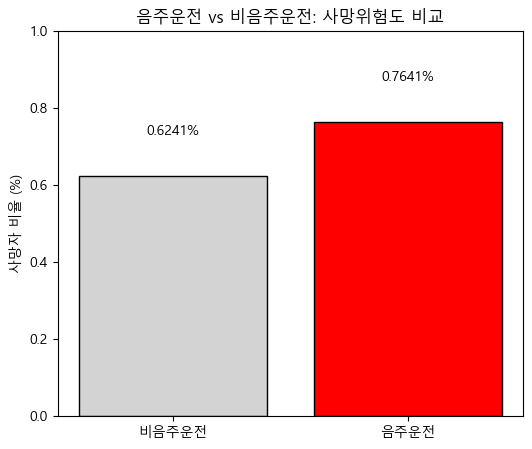

In [94]:
# 소계 행 선택
summary = df10[df10['구'] == '소계']

labels = ['비음주운전', '음주운전']
death_rates = [
    summary['비음주운전교통사고사망위험도 명'].values[0],
    summary['음주운전교통사고사망위험도 명'].values[0]
]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, death_rates, color=['#d3d3d3', 'red'], edgecolor='black')

plt.ylabel('사망자 비율 (%)')
plt.title('음주운전 vs 비음주운전: 사망위험도 비교')

# 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.4f}%', ha='center', va='bottom')

plt.ylim(0, 1)

# plt.tight_layout()
plt.show()


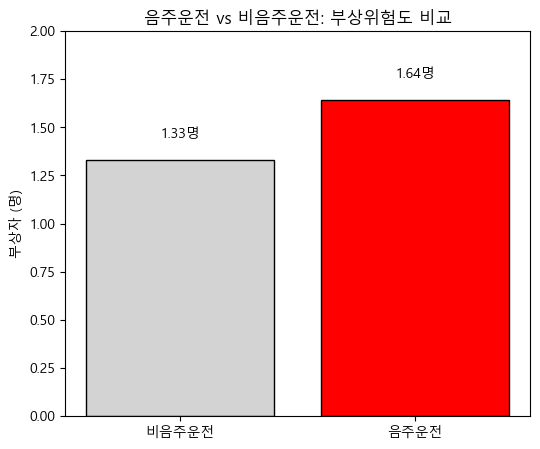

In [95]:
# 소계 행 선택
summary = df10[df10['구'] == '소계']

labels = ['비음주운전', '음주운전']
death_rates = [
    summary['비음주운전교통사고부상위험도 명'].values[0],
    summary['음주운전교통사고부상위험도 명'].values[0]
]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, death_rates, color=['#d3d3d3', 'red'], edgecolor='black')

plt.ylabel('부상자 (명)')
plt.title('음주운전 vs 비음주운전: 부상위험도 비교')

# 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}명', ha='center', va='bottom')

plt.ylim(0, 2)

# plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import glob
import os
# CSV 파일이 있는 폴더 경로
folder_path = f'./moving'  # 경로를 실제 폴더로 바꿔줘

# 폴더 내 모든 CSV 파일 경로 가져오기
all_files = glob.glob(os.path.join(folder_path, '*.csv'))

# CSV 파일들을 하나로 합치기
df_list = [pd.read_csv(file, encoding='utf-8', header=0) for file in all_files]
merged_df = pd.concat(df_list, ignore_index=True)

filtered_df = merged_df[
    (merged_df['출발 시군구 코드'] == 11150) |
    (merged_df['도착 시군구 코드'] == 11150)
]

filtered_df['출발 시군구 코드'] = filtered_df['출발 시군구 코드'].astype(str)
filtered_df['도착 시군구 코드'] = filtered_df['도착 시군구 코드'].astype(str)
filtered_df['나이'] = filtered_df['나이'].apply(lambda x: x - 5 if x % 10 == 5 else x)
filtered_df.drop('평균 이동 시간(분)', inplace=True, axis=1)
# 합쳐진 CSV 저장
filtered_df.to_csv(f'./moving/양천구_생활이동_2023.csv', encoding='utf-8', index=False)

In [2]:
import pandas as pd
df12 = pd.read_csv('./moving/양천구_생활이동_2023.csv', encoding='utf-8', header=0)
df12.replace('*',0,inplace=True)
df12['대상연월'] = df12['대상연월'].astype(str).str[4:]
df12.rename(columns={'대상연월':'월'}, inplace=True)
df12['이동인구(합)'] = df12['이동인구(합)'].astype(float)
grouped_df = df12.groupby(['월','요일','도착시간','출발 시군구 코드','도착 시군구 코드','나이','이동유형'], as_index=False)['이동인구(합)'].sum()
grouped_df

,월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,나이,이동유형,이동인구(합)
0,01,금,0,11010,11150,0,EE,28.06
1,01,금,0,11010,11150,10,EE,4.57
2,01,금,0,11010,11150,10,EH,46.60
3,01,금,0,11010,11150,10,EW,4.54
4,01,금,0,11010,11150,20,EE,17.56
...,...,...,...,...,...,...,...,...
7459648,12,화,23,39000,11150,40,EH,26.59
7459649,12,화,23,39000,11150,50,EE,3.28
7459650,12,화,23,39000,11150,50,EH,19.59
7459651,12,화,23,39000,11150,60,EE,3.84


In [6]:
grouped_df['이동인구(합)'] = grouped_df['이동인구(합)'].round(2)
grouped_df.to_csv('./result/양천구_생활이동_2023.csv', encoding='utf-8', index=False)


In [6]:
import pandas as pd
df11 = pd.read_csv('./moving/생활이동_2023.csv', encoding='utf-8', header=0)
df11['도착 시군구 코드'].describe()

count    776463.000000
mean      11134.997972
std          15.000010
min       11120.000000
25%       11120.000000
50%       11120.000000
75%       11150.000000
max       11150.000000
Name: 도착 시군구 코드, dtype: float64

In [3]:
import geopandas as gpd

geo_df = gpd.read_file('./analysis/서울특별시_행정구별.geojson')
geo_df = geo_df.to_crs(epsg=3857)
geo_df['위도'] = geo_df.geometry.centroid.y
geo_df['경도'] = geo_df.geometry.centroid.x
geo_df = geo_df.to_crs(epsg=4326)
geo_df = geo_df[['sgg', '위도', '경도']]



# 출발 좌표 붙이기
df_start = filtered_df.merge(geo_df.rename(columns={
    'sgg': '출발 시군구 코드',
    '위도': '출발 위도',
    '경도': '출발 경도'
}), on='출발 시군구 코드', how='left')

# 도착 좌표 붙이기
df_end = filtered_df.merge(geo_df.rename(columns={
    'sgg': '도착 시군구 코드',
    '위도': '도착 위도',
    '경도': '도착 경도'
}), on='도착 시군구 코드', how='left')

start = df_start.copy()
start['위도'] = start['출발 위도']
start['경도'] = start['출발 경도']
start['순서'] = 1

end = df_end.copy()
end['위도'] = end['도착 위도']
end['경도'] = end['도착 경도']
end['순서'] = 2

path_df = pd.concat([start, end], ignore_index=True)
path_df['이동 ID'] = path_df['출발 시군구 코드'].astype(str) + '_' + path_df['도착 시군구 코드'].astype(str)
path_df.to_csv('./moving/path_ready.csv', encoding='utf-8', index=False)


In [7]:
# filtered_df와 geo_df의 시군구 코드 값이 일치하는지 확인
print(filtered_df['출발 시군구 코드'].unique())  # 출발 시군구 코드 확인
print(geo_df['sgg'].unique())  # geo_df에서 시군구 코드 확인


['11120' '11150']
['11680' '11740' '11305' '11500' '11620' '11215' '11530' '11545' '11350'
 '11320' '11230' '11590' '11440' '11410' '11650' '11200' '11290' '11710'
 '11470' '11560' '11170' '11380' '11110' '11140' '11260']
